In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [0]:
# pandas 출력 설정 : 출력시 가로 생략 없애기
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.width',250)
pd.set_option('display.expand_frame_repr', False)


# 나이브베이즈 분류 이해


# ex) 10마리의 동물이 개인지 고양이 인지 분류
# 덩치가 크고 사람을 잘 따르지 않고 산책을 싫어하는 개체 x는
# 무엇으로 구분해야 할까?

# big  follow  walking  target
# yes    yes     yes      dog
# yes    yes     no       cat
# no     yes     yes      dog
# yes    yes     yes      dog
# no     no      yes      cat
#
# yes    no      yes      dog
# yes    no      yes      cat
# no     no      no       cat
# yes    yes     yes      dog
# no     yes     no       dog


# 개체 x가 존재할때 그 개체가 개일 확률
# P(개|개체x)

# 개체 x가 존재할때 그 개체가 고양이일 확률
# P(고양이|개체x)

# ==> 이라한 표현을 조건부확률이라 함

# 100일 중 10일동안 비가 내렸음
# 이때, 비올 확률은? P(비) = 10/100 = 0.1

# 그런데 비가 온 중에서 5일은 무지개가 떴음
# 이때, 무지개가 뜰 확률은?
# P(무지개 | 비) = 5/10 = 0.5

# 한편, 비가 오고 무지개도 뜬다와 같이 
# 양쪽이 동시에 일어날 확률은?(결합확률, 곱셈법칙)
# P(무지개, 비) = (10/100) * (5/10) = 50/100

# 조건부 확률과 곱셈법칙 간의 관계는 
# P(A | B) = P(A ∩ B) / P(B) 이므로
# P(무지개 | 비) = P(무지개, 비) / P(비) = 0.5

# 베이즈 정리
# P(A | B) = P(B | A)P(A) / P(B)

# 베이즈 정리를 이용해서 
# P(개 | 개체X) 는 P(개체X | 개)P(개) / P(개체X) 로 정리할 수 있음

# 따라서, 개체X에 따라 개/고양이로 분류될 확률은
# P(개 |덩치큼, 사람을 안 따름, 산책 싫어함) 으로 나눌 수 있음

# 또한, P(개 |덩치큼, 사람을 안 따름, 산책 싫어함) 은
# P(덩치큼, 사람을 안 따름, 산책 싫어함 | 개) * P(개)로
# 다시 정리할 수 있음 (분모는 상수로 취급)

# P(고양이 |덩치큼, 사람을 안 따름, 산책 싫어함) 은
# P(덩치큼, 사람을 안 따름, 산책 싫어함 | 고양이) * P(고양이)로
# 다시 정리할 수 있음 (분모는 계산의 용이성을 위해 상수로 취급)


# 그럼 개체X 일 때 개일 확률 P는
# P(덩치큼, 사람을 안 따름, 산책 싫어함 | 개) * P(개) = 
# P(덩치큼 | 개) * P(사람을 안 따름 | 개) * 
# P(산책 싫어함 | 개) * P(개) = 
# 4/6 * 1/6 * 1/6 * 6/10 = 0.01111111111111111


# 그럼 개체X 일 때 고양이일 확률 P는
# P(덩치큼, 사람을 안 따름, 산책 싫어함 | 고양이) * P(고양이) = 
# P(덩치큼 | 고양이) * P(사람을 안 따름 | 고양이) * 
# P(산책 싫어함 | 고양이) * P(고양이) = 
# 2/4 * 3/4 * 2/4 * 4/10 = 0.075

# 따라서, 개 : 고양이 = 0.011 : 0.075 이므로
# 개체X는 고양이로 분류 될 확률이 높음

In [0]:
# sklearn 에서 구현된 나이브베이즈 알고리즘은 3가지

# GaussianNB    : 연속형 데이터, iris 데이터셋 분류
# BernoulliNB   : 이진 데이터, 스팸 메일 분류
# MultinomialNB : 테스트데이터, 영화리뷰

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


# 주의사항!!!
# 간혹 특정 데이터의 경우 빈도수가 0인 상황이 발생할 수 있음 
# => 확률이 0이 되므로 분류가 어려워짐
# => 이런 문제를 극복하기 위해서 smoothing 기법을 사용
# => 확률이 0이 되지 않도록 1을 더해줌


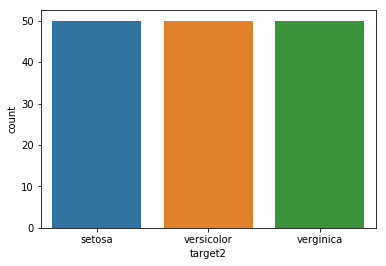

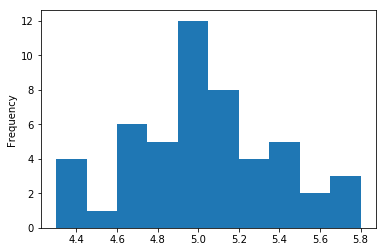

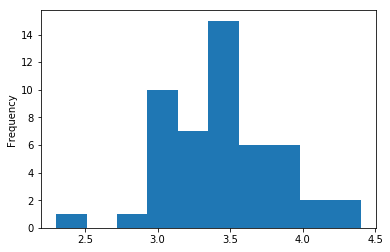

[[6.1 3.  4.6 1.4]
 [6.1 2.9 4.7 1.4]
 [5.1 3.4 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [5.1 3.7 1.5 0.4]
 [5.8 2.8 5.1 2.4]
 [6.9 3.1 5.1 2.3]
 [6.5 3.  5.2 2. ]
 [7.7 2.6 6.9 2.3]
 [6.4 3.2 5.3 2.3]
 [6.4 3.1 5.5 1.8]
 [5.1 3.8 1.9 0.4]
 [5.1 3.3 1.7 0.5]
 [6.6 2.9 4.6 1.3]
 [5.  3.  1.6 0.2]
 [5.5 3.5 1.3 0.2]
 [5.7 3.  4.2 1.2]
 [6.  2.9 4.5 1.5]
 [5.7 2.9 4.2 1.3]
 [6.3 2.5 5.  1.9]
 [5.  3.4 1.5 0.2]
 [5.9 3.2 4.8 1.8]
 [6.5 2.8 4.6 1.5]
 [5.4 3.4 1.5 0.4]
 [7.2 3.6 6.1 2.5]
 [6.4 2.8 5.6 2.2]
 [5.2 4.1 1.5 0.1]
 [6.5 3.2 5.1 2. ]
 [6.1 3.  4.9 1.8]
 [6.5 3.  5.8 2.2]
 [4.4 2.9 1.4 0.2]
 [5.6 2.8 4.9 2. ]
 [6.3 2.5 4.9 1.5]
 [5.  3.2 1.2 0.2]
 [5.1 3.8 1.5 0.3]
 [6.3 3.3 4.7 1.6]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 4.  1. ]
 [4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.7 1.5 0.2]
 [6.  3.  4.8 1.8]
 [4.6 3.4 1.4 0.3]
 [4.9 2.4 3.3 1. ]
 [5.  3.5 1.6 0.6]
 [6.8 3.  5.5 2.1]
 [4.6 3.2 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [6.8 3.2 5.9 2.3]
 [6.3 2.8 5.1 1.5]
 [6.4 2.9 4.3 1.3]
 [7.3 2.9 6.3 1.8]
 [6.3 3.4 5.

0.9807692307692308

In [16]:
# 나이브 베이즈로 붓꽃 분류
from sklearn.datasets import load_iris

# 데이터 적재
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['target'] = iris.target



# 숫자형 값을 범주값으로 변경함
df['target2'] = df.target.map({0: 'setosa', 1: 'versicolor', 2: 'verginica'})

df.head()

df.target2.value_counts()



# EDA 시각화
# 분류값 분포 시각화
sns.countplot(df.target2)
plt.show()



# 정규분포 여부 확인
setosa = df[df.target2 == 'setosa']

setosa.iloc[:, 0].plot(kind='hist')
plt.show()

setosa.iloc[:, 1].plot(kind='hist')
plt.show()



# 나이브 베이즈 분석
X_train, X_test, y_train, y_test = \
    train_test_split(iris.data, iris.target, random_state=1907101130)


#print(X_train)

gnb = GaussianNB()
gnb.fit(X_train, y_train)




pred = gnb.predict(X_test)



# 분석 결과 평가
confusion_matrix(y_test, pred)

accuracy_score(y_test, pred)
metrics.classification_report(y_test, pred)

# 다항분류의 경우, roc_auc_score 를 사용할 수 없음
# 따라서, 이항 레이블 인코딩 형태로 변환

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
yl_test = lb.fit_transform(y_test)
yl_pred = lb.transform(pred)


roc_auc_score(yl_test, yl_pred)


In [5]:
# 나이브 베이즈로 스팸 분류 1

# 데이터 적재
spam = pd.read_csv('spam.csv', encoding='euc-kr')

# NaN을 0으로 변경
spam.fillna('0', inplace=True)

# 문서번호 컬럼 삭제
data = spam.iloc[:, 1:13]
target = spam.iloc[:, 13]

# ham은 0으로, spam은 1로 레이블 인코딩함(알파벳순으로 0, 1 설정)
target = target.map({'ham': 0, 'spam': 1})

# 나이브 베이즈 분석
bnb = BernoulliNB()

bnb.fit(data, target)
print('훈련정확도', bnb.score(data, target))

doc = np.array([[1,0,1,0,0,1,0,0,0,0,0,0]])
bnb.predict(doc)


훈련정확도 0.95


array([1])

In [0]:
# 나이브 베이즈로 스팸 분류 2
email_list = [
{'email title': 'free game only today', 'spam': True},
{'email title': 'cheapest flight deal', 'spam': True},
{'email title': 'limited time offer only today only today', 'spam': True},
{'email title': 'today meeting schedule', 'spam': False},
{'email title': 'your flight schedule attached', 'spam': False},
{'email title': 'your credit card statement', 'spam': False} ]






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
movie_review    10 non-null object
type            10 non-null object
dtypes: object(2)
memory usage: 240.0+ bytes


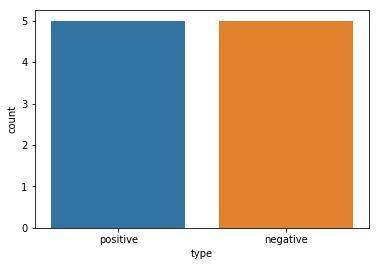

--------------------------------------------
[[0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
  0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  1]
 [0 0 1 0 0 0 0 1 2 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
  0]
 [0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
  0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
  0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 2 0 0 1 1 0 0 0 0 2 0 0 0 1 1
  0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
  0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
  0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0]]
--------------------------------------------
훈련정확도 0.9


In [15]:
# 나이브 베이즈로 영화리뷰 분류 3

# 데이터 적재
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

df = pd.DataFrame(review_list)
df.info()

sns.countplot(df.type)
plt.show()


# 리뷰결과를 레이블 인코딩 처리함
df['type2'] = df.type.map({'negative': 0, 'positive': 1})


# 리뷰내용을 CountVectorizer로 처리함
from sklearn.feature_extraction.text import CountVectorizer

vectors = CountVectorizer()
data = vectors.fit_transform(df.movie_review)

#print(data)
print('--------------------------------------------')

# 37개의 단어가 벡터화 되었음
vectors.vocabulary_   # 단어사전
vectors.get_feature_names()


# 벡터화 된 결과 확인
print(data.toarray())
print('--------------------------------------------')

# 벡터화된 수치를 단어로 변환
vectors.inverse_transform(data.toarray()[0]) # 뒤에 0 이상한디?


# 나이브 베이즈 분석
mnb = MultinomialNB()
mnb.fit(data, df.type2)

print('훈련정확도', mnb.score(data, df.type2))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
movie_review    10 non-null object
type            10 non-null object
dtypes: object(2)
memory usage: 240.0+ bytes


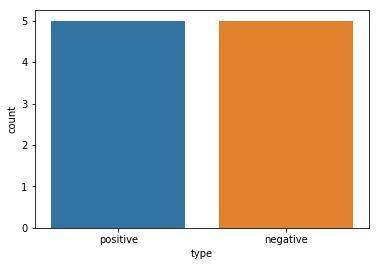

훈련정확도 0.9


In [17]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]


df = pd.DataFrame(test_feedback_list)
df.info()

sns.countplot(df.type)
plt.show()


# 리뷰결과를 레이블 인코딩 처리함
df['type2'] = df.type.map({'negative': 0, 'positive': 1})


# 리뷰내용을 CountVectorizer로 처리함
from sklearn.feature_extraction.text import CountVectorizer

vectors = CountVectorizer()
data = vectors.fit_transform(df.movie_review)


# 37개의 단어가 벡터화 되었음
vectors.vocabulary_   # 단어사전
vectors.get_feature_names()


# 벡터화 된 결과 확인
data.toarray()


# 벡터화된 수치를 단어로 변환
vectors.inverse_transform(data.toarray()[0])


# 나이브 베이즈 분석
mnb = MultinomialNB()
mnb.fit(data, df.type2)

print('훈련정확도', mnb.score(data, df.type2))

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
iris_train, iris_test, target_iris_train, target_iris_test = train_test_split(iris.data, iris.target, test_size=0.3, stratify=iris.target, random_state=1907101650)

(105, 4) (45, 4) (105,) (45,)


In [39]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(iris_train, target_iris_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
pred = gnb.predict(iris_test)
print('결과예측(prediction) : \n ', pred)

# 위의 예측된 결과를 text로 확인. print() 코드를 삽입해 한 칸 띄우고 출력하도록 함
# 굳이 target_names를 확인하는 것이 필수는 아닐 수 있으나, HCI (Human Computer Interaction) sub-domain인
# 자연어처리 관점에서, 보다 인간에게 이해가 쉬운 text-based human language로 변환하는 과정이라 할 수 있음 
# (단, 그렇다해도, 본 시험에서는 단순히, 출력값에 대한 'human'의 quick recognition을 위함임)

print()
print(iris.target_names[pred]) 

결과예측(prediction) : 
  [2 0 2 0 1 1 0 0 1 2 0 1 0 0 1 0 0 2 0 1 1 1 2 2 1 2 0 2 1 0 1 2 2 0 2 1 2
 0 2 0 1 2 2 2 1]

['virginica' 'setosa' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa' 'versicolor' 'setosa'
 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'virginica' 'setosa' 'virginica' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'virginica' 'setosa' 'virginica' 'versicolor' 'virginica'
 'setosa' 'virginica' 'setosa' 'versicolor' 'virginica' 'virginica'
 'virginica' 'versicolor']


In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("정확도 : \n", gnb.score(iris_test, target_iris_test))
print()
print("혼동행렬 : \n", confusion_matrix(target_iris_test, pred))
print()
print("classification_report : \n", metrics.classification_report(target_iris_test, pred))

정확도 : 
 0.9777777777777777

혼동행렬 : 
 [[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]

classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

